# From Questions to Data: Exploring Ourselves as a Dataset

In this activity, we will turn a (sort of) real-world question into a data question, collect our own data, explore it visually, and start thinking about samples vs. populations, bias, simulation, and even a tiny preview of inference.

*No statistics equations quite yet: just thinking like a data scientist using curiosity, exploration, and simulation.* 

## Scenario
The Student Union wants to organise a movie night for the department.
They ask:
* **"How many people will actually show up?"**
* And: **"Are physics students less enthusiastic about movies than other departments?"**

To make decisions (room size, budget, snacks), they need data-based expectations, not just guesses.

## Warm-Up Discussion 

**Discuss in teams of 2-3 people**:

* What information would you need to estimate how many people might attend?
* What could be measured?
* Who is the population? Who do we actually observe?
* What biases might appear in using just our class as data?

Write your thoughts below:

* information needed: survey taken 
* what biases: just even assuming that someone would want to come to the movie...    
* 


## Collect Our Class Data

We’ll enter two pieces of data per student:

* `movies_per_month`: How many movies did you watch last month (December)?
* `will_attend_movie_night`: Would you personally attend a student union movie night? (1 = Yes, 0 = No)

**Check the screen/board for where to download the data** 


In [26]:
import pandas as pd
import numpy as np

In [27]:
data = pd.read_csv("statphys_movies.csv")
data.head()

,#,Username,First name,Last name,Email,Q1 - How many movies did you watch last month? (0 pts),Q2 - Would you attend a movie night? (0 pts),Total
0,1,User 1,NaN,NaN,NaN,3.0,Yes,/
1,2,User 2,NaN,NaN,NaN,0.0,No,/
2,3,User 3,NaN,NaN,NaN,6.0,Yes,/
3,4,User 4,NaN,NaN,NaN,0.0,/,/
4,5,User 5,NaN,NaN,NaN,3.0,Yes,/


In [28]:
# rename columns to something more sensible
col_rename = {"#": "student_id",
              "Q1 - How many movies did you watch last month? (0 pts)": "movies_per_month", 
              "Q2 - Would you attend a movie night? (0 pts)": "will_attend_movie_night"}
data = data.rename(columns=col_rename)

# remove all columns except 
data = data[["student_id", "movies_per_month", "will_attend_movie_night"]]

# change movie night attendance from Yes/No to 1/0
data["will_attend_movie_night"] = data.will_attend_movie_night.map(dict(Yes=1, No=0))
data.head()

,student_id,movies_per_month,will_attend_movie_night
0,1,3.0,1.0
1,2,0.0,0.0
2,3,6.0,1.0
3,4,0.0,NaN
4,5,3.0,1.0


**If the data import doesn't work for some reason, remove the comments from the code below and run it instead to simulate some data**

In [29]:
# #"""
# # number of students: adjust as needed!
# n = 50

# # Empty template
# data = pd.DataFrame({
#     "student_id": range(1, n+1),  # adjust size n as needed
#     "movies_per_month": [None]*n,   # FILL IN MOVIES PER MONTH HERE
#     "will_attend_movie_night": [None]*n # FILL IN MOVIE ATTENDANCE HERE
# })

# # Uncomment to simulate fake class data (for demonstration or testing)
# data['movies_per_month'] = np.random.poisson(lam=3, size=len(data))
# data['will_attend_movie_night'] = (data['movies_per_month'] > 2).astype(int)


# # show first few rows of table
# data.head()
# #"""


In [30]:
# len(data)

## Exploratory Data Analysis
First question: What does our class look like in terms of movie-watching? What kind of representation(s) would be helpful in figuring this out? Discuss with a neighbour (and don't peek yet below :) ).



In [31]:
import matplotlib.pyplot as plt

**Solution**:
* plot histogram
* compute mean and variance
* look for outliers

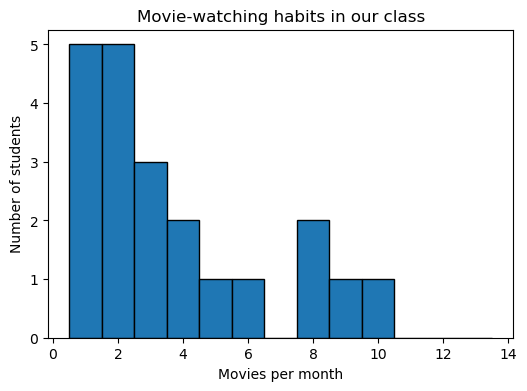

In [34]:
import matplotlib.pyplot as plt

# Make sure types are numeric
data['movies_per_month'] = data['movies_per_month'].astype(float)
data['will_attend_movie_night'] = data['will_attend_movie_night'].astype(float)

# plot a histogram of the movies per month
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.hist(data['movies_per_month'], bins=np.arange(0.5, 14, 1), edgecolor='black')
ax.set_xlabel("Movies per month")
ax.set_ylabel("Number of students")
ax.set_title("Movie-watching habits in our class")
plt.show()

### Side Note: Tukey's 5-Number Summary

Statistician John Tukey came up with a 5-number summary that can describe samples like the one we collected above. It includes the following five summaries of the data:
* the sample minimum (the smallest observation)
* the lower/first quartile (the point below which 25% of the data points fall)
* the median (the point below which 50% of the data points fall)
* the upper quartile (the point below which 75% of the data points fall)
* the sample maximum (the largest observation)

In `pandas`, you can access it using the `describe()` method:

In [35]:
data.describe()

,student_id,movies_per_month,will_attend_movie_night
count,25.000000,25.000000,23.000000
mean,13.000000,3.734864,0.782609
std,7.359801,3.717371,0.421741
min,1.000000,0.000000,0.000000
25%,7.000000,1.000000,1.000000
50%,13.000000,2.000000,1.000000
75%,19.000000,5.000000,1.000000
max,25.000000,15.000000,1.000000


**Question**: In the summary above, the quartiles are all at integer numbers. Is this something you'd expect? Why or why not?

**Reflection Questions**
* Is the class mostly low movie watchers, or are there some outliers?
* What does the mean represent here? Does it describe a “typical” student?
* If one person watches 20 movies/month, what happens to the mean? Why does that matter?

## Compare to a Hypothetical Population
Let’s imagine a simulated student population in the Film Studies degree.

We don’t have their data — but we simulate based on the Student Union’s stereotype that "film studies students love movies".

**Important idea**: We can simulate a population to compare to a sample. Just remember that simulations are always an *approximation* of reality, and drawing conclusions based on simulations alone can lead to biases. In reality, you'll want to ask some actual film studies students for their information. 

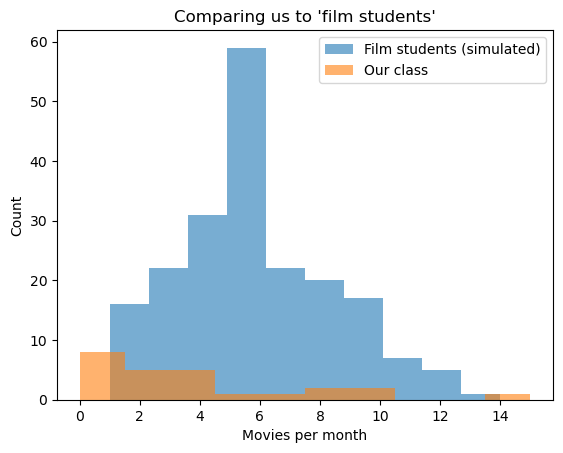

In [37]:
# Simulated film studies population

lam = 6 # average number of movies per month for the media studies students: adustable!

# draw number of movies for media students from a Poisson distribution
film_students = pd.DataFrame({
    "movies_per_month": np.random.poisson(lam=lam, size=200)
})

plt.hist(film_students['movies_per_month'], alpha=0.6, label="Film students (simulated)")
plt.hist(data['movies_per_month'], alpha=0.6, label="Our class")
plt.legend()
plt.xlabel("Movies per month")
plt.ylabel("Count")
plt.title("Comparing us to 'film students'")
plt.show()


**Question**: What do you notice in this histogram about the two populations? Specifically, consider the widths and heights of the bins.

Let's change our plotting something: we'll make sure they have the same number of bins, across the same range, and we'll also use the "density" parameter to plot the *probability density* rather than the number of counts in each bin:

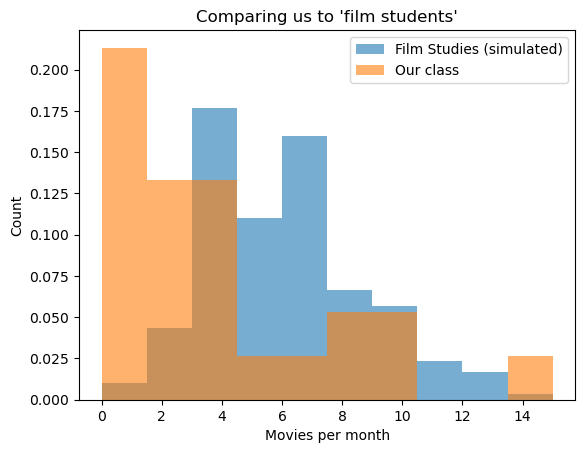

In [38]:
plt.hist(film_students['movies_per_month'], alpha=0.6, range=[0,15], 
         label="Film Studies (simulated)", density=True)
plt.hist(data['movies_per_month'], alpha=0.6, label="Our class", range=[0,15], density=True)
plt.legend()
plt.xlabel("Movies per month")
plt.ylabel("Count")
plt.title("Comparing us to 'film students'")
plt.show()


**Discussion Prompt**
* Does our class look different from the film studies population?
    - **NO** 
* If yes — is that evidence, or just a result of small sample randomness?
* What assumptions went into the film studies simulation? How could that influence our conclusion?
    - **assumption: film students watch a lot of movies per month**

## Prediction: Do More Movies = More Attendance?

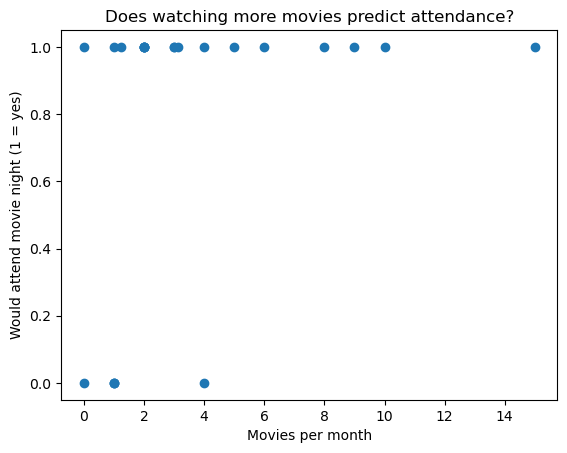

In [39]:
plt.scatter(data['movies_per_month'], data['will_attend_movie_night'])
plt.xlabel("Movies per month")
plt.ylabel("Would attend movie night (1 = yes)")
plt.title("Does watching more movies predict attendance?")
plt.show()

**Questions**
* Do you see a pattern or cluster?
    - **tentatively, could say there is relationship but not enough data**
* Could we draw a line or threshold by eye?
* We're already thinking like modelers — without writing anything like a formula!

## Simulation Preview of Hypothesis Testing
Imagine we take many random samples from the film studies population that are the same size as our class.
Where does our class mean fall compared to those samples?


- made distribution of same size as original distribution, then calculates mean 
- idea is that, if when you compare the sample of our physics class with only 25 film students instead of 200 at once, they are actually the same, that the difference was due to random fluctuations (or sample size), rather than actual intrinsic or sample-based characteristics. But then we see that the distribution still was different, so then it's kind of ruled out that there is not a random distribution or reason for the distributions

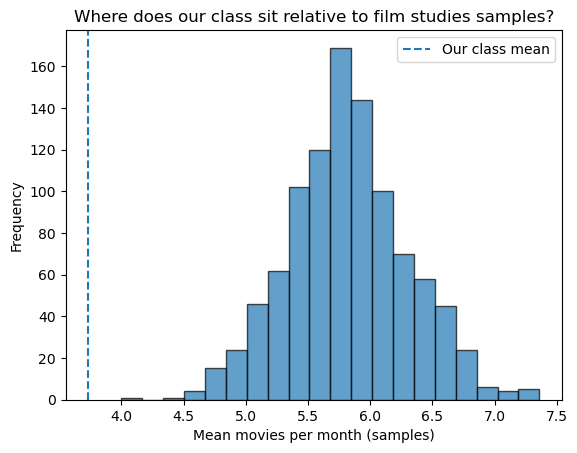

In [40]:
# Compare class mean with simulated sample means from film studies students
sample_means = []
for _ in range(1000):
    sample = np.random.choice(film_students['movies_per_month'], size=len(data), replace=False)
    sample_means.append(sample.mean())

plt.hist(sample_means, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(data['movies_per_month'].mean(), linestyle='--', label="Our class mean")
plt.xlabel("Mean movies per month (samples)")
plt.ylabel("Frequency")
plt.title("Where does our class sit relative to film studies samples?")
plt.legend()
plt.show()

**Questions to discuss**: Can you conclude that our class is similar in movie-watching habits to the (simulated) film studies class? Do you think our class is a representative sample of the overall population? Why or why not? 

## Big Takeaway

You just did a simulation-based hypothesis test, even |though we never used any statistics words.

What we’ve done today:
* Turned a question into data
* Explored the data visually
* Thought about samples vs populations
* Used simulation to reason about difference
* Started thinking like statisticians